In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas_datareader as pdr

In [6]:
import datetime as dt

In [7]:
end=dt.datetime.now()
start = end - dt.timedelta(days = 2500)
end,start

(datetime.datetime(2022, 9, 18, 13, 55, 21, 722712),
 datetime.datetime(2015, 11, 14, 13, 55, 21, 722712))

In [8]:
stocklist = ['TTM']
stocks = [i + "" for i in stocklist]
stocks

['TTM']

In [9]:
df=pdr.get_data_yahoo(stocks,start,end)

In [10]:
df.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TTM,TTM,TTM,TTM,TTM,TTM
Date,,,,,,
2015-11-16,30.497259,30.510000,30.580000,30.000000,30.010000,1737600.0
2015-11-17,30.697174,30.709999,31.040001,30.559999,30.700001,1050000.0
2015-11-18,30.647196,30.660000,30.830000,30.320000,30.549999,1086700.0
2015-11-19,30.707170,30.719999,30.840000,30.459999,30.660000,1095700.0
2015-11-20,30.467272,30.480000,30.920000,30.320000,30.709999,890200.0


In [11]:
df.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TTM,TTM,TTM,TTM,TTM,TTM
Date,,,,,,
2022-09-12,28.750000,28.750000,28.860001,28.480000,28.540001,332700.0
2022-09-13,28.020000,28.020000,28.340000,27.959999,28.260000,454500.0
2022-09-14,28.090000,28.090000,28.389999,27.959999,28.389999,511000.0
2022-09-15,27.610001,27.610001,28.049999,27.600000,27.760000,510800.0
2022-09-16,26.770000,26.770000,27.080000,26.580000,26.980000,723500.0


In [12]:
df.columns

MultiIndex([('Adj Close', 'TTM'),
            (    'Close', 'TTM'),
            (     'High', 'TTM'),
            (      'Low', 'TTM'),
            (     'Open', 'TTM'),
            (   'Volume', 'TTM')],
           names=['Attributes', 'Symbols'])

In [13]:
#getting the close column values
df1=df.reset_index()['Close']

In [14]:
df1.head()

Symbols,TTM
0,30.510000
1,30.709999
2,30.660000
3,30.719999
4,30.480000


In [15]:
df1.shape

(1721, 1)

Text(0, 0.5, 'Close values')

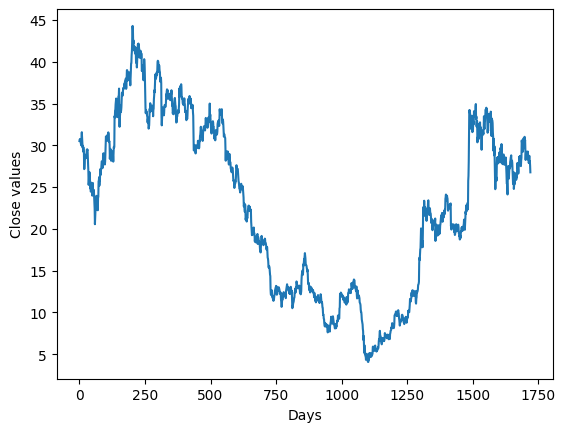

In [16]:
plt.plot(df1)
plt.xlabel("Days")
plt.ylabel("Close values")

In [17]:
import numpy as np

In [18]:
#we have to apply minmax scalar to contain the values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
print(df1)

[[0.65729917]
 [0.66227303]
 [0.66102958]
 ...
 [0.59711514]
 [0.58517782]
 [0.56428749]]


In [20]:
#splitting dataset into train and test split
training_size  = int(len(df1)*0.65)
test_size = len(df1) - training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(1118, 603)

In [22]:
train_data

array([[0.65729917],
       [0.66227303],
       [0.66102958],
       ...,
       [0.02312858],
       [0.01964685],
       [0.02287988]])

In [23]:
test_data

array([[0.02486943],
       [0.04476499],
       [0.04575976],
       [0.03780154],
       [0.03805024],
       [0.03456851],
       [0.03257896],
       [0.0353146 ],
       [0.03655808],
       [0.0440189 ],
       [0.04874409],
       [0.03655808],
       [0.03929371],
       [0.03481721],
       [0.03730415],
       [0.03083811],
       [0.0355633 ],
       [0.03705546],
       [0.03431982],
       [0.03805024],
       [0.04302412],
       [0.04153196],
       [0.04053718],
       [0.04924148],
       [0.06291968],
       [0.06789356],
       [0.06466053],
       [0.08380999],
       [0.0925143 ],
       [0.08057698],
       [0.07784133],
       [0.06142751],
       [0.07261875],
       [0.06540662],
       [0.05545884],
       [0.05247451],
       [0.056951  ],
       [0.06242229],
       [0.06739617],
       [0.06988311],
       [0.06540662],
       [0.07137528],
       [0.06267098],
       [0.06540662],
       [0.0619249 ],
       [0.06466053],
       [0.06938572],
       [0.085

In [24]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [26]:
X_train.shape,y_train.shape

((1017, 100), (1017,))

In [27]:
X_test.shape, y_test.shape

((502, 100), (502,))

Creating a stack LSTM model.

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [31]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 12s 405ms/step - loss: 0.0763 - val_loss: 0.0171
Epoch 2/100
16/16 [==============================] - 5s 333ms/step - loss: 0.0101 - val_loss: 0.0041
Epoch 3/100
16/16 [==============================] - 5s 304ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 4/100
16/16 [==============================] - 5s 287ms/step - loss: 0.0020 - val_loss: 0.0037
Epoch 5/100
16/16 [==============================] - 6s 362ms/step - loss: 0.0019 - val_loss: 0.0031
Epoch 6/100
16/16 [==============================] - 5s 296ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 7/100
16/16 [==============================] - 5s 296ms/step - loss: 0.0018 - val_loss: 0.0030
Epoch 8/100
16/16 [==============================] - 5s 298ms/step - loss: 0.0017 - val_loss: 0.0029
Epoch 9/100
16/16 [==============================] - 5s 307ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 10/100
16/16 [==============================] - 5s 290ms/step - loss: 0.0017 - val_l

In [32]:
import tensorflow as tf

In [33]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 1s 48ms/step


In [34]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [35]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

25.96342535275289

In [36]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

24.350402711650013

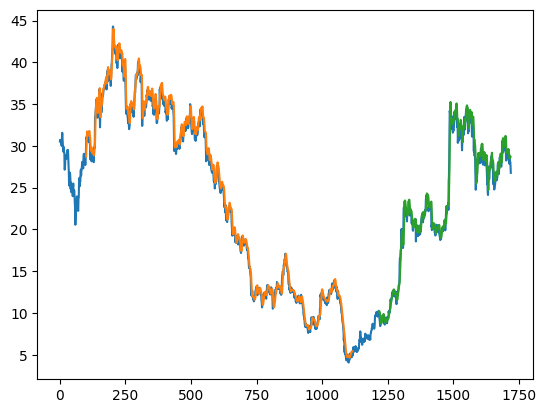

In [37]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict  


# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions


plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
len(test_data)

603

In [39]:
x_input=test_data[503:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [41]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.5915606]
101
1 day input [0.58865952 0.60606815 0.60009944 0.60208904 0.60855505 0.59661774
 0.57746826 0.55831883 0.53046504 0.5317085  0.50683906 0.4983835
 0.55483708 0.54737627 0.58318827 0.54787367 0.54538671 0.56403879
 0.57945781 0.57647351 0.57597611 0.59512558 0.59960209 0.6073116
 0.61054461 0.61477241 0.58244217 0.58990298 0.59910469 0.59214123
 0.57373785 0.56130314 0.52971894 0.54488931 0.56528224 0.51479732
 0.52449638 0.54712757 0.52922159 0.54215366 0.56180054 0.55458838
 0.55110667 0.55284753 0.54190501 0.55309623 0.54861972 0.55558318
 0.58741607 0.59238993 0.57647351 0.57324045 0.56055708 0.5680179
 0.59040038 0.59462818 0.61054461 0.59960209 0.61278286 0.59960209
 0.59512558 0.58368562 0.58269087 0.59960209 0.607809   0.65904002
 0.65356876 0.6431236  0.63392189 0.62521758 0.63441929 0.63317584
 0.66550608 0.63864709 0.65481222 0.65356876 0.66998259 0.65481222
 0.66028348 0.62670978 0.60109424 0.61701067 0.62571498 0.62472022
 0.60930115 0.60979855 0.61949762 0.6

In [42]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

1751

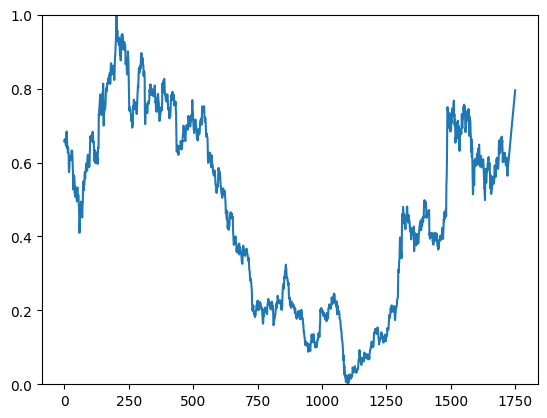

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[:],scaley=False)
len(df3)

# 150 DAYS FUTURE STOCK PREDICTION GRAPHICAL PRESENTATION

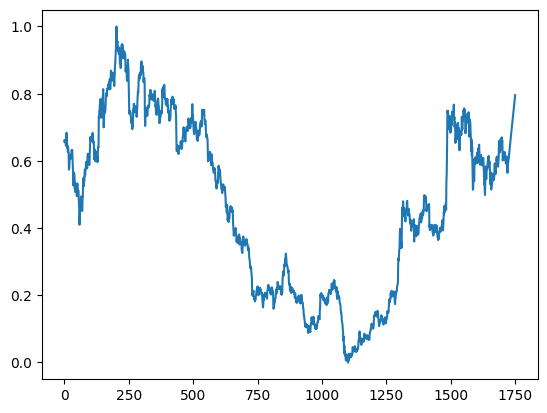

In [46]:
plt.plot(df3)

In [ ]:
#df3[1841:]

In [ ]:
#xl = pd.DataFrame(df3[1721:],columns=['frequency'])

In [ ]:
#xl

In [ ]:
#xl.to_excel("C:\\Users\\Lenovo\\Desktop\\Stock Data.xlsx")

In [47]:
import pickle

In [63]:
print(df3)

[[0.6572991706852145], [0.6622730291944818], [0.6610295764258356], [0.6625217292351476], [0.6565530705632172], [0.6525739647819303], [0.6471027061913314], [0.6446157532193564], [0.6702312881917383], [0.683660758344911], [0.6667495350571003], [0.6535687649445933], [0.6381496944660945], [0.6433723004507101], [0.6264610771628994], [0.6391444946287576], [0.6254662770002365], [0.6249688769189049], [0.5737378544088237], [0.5752300072181357], [0.5913951778186317], [0.6170106653563311], [0.6055707480938017], [0.6107933066437349], [0.6105446066030692], [0.6065655008217822], [0.6122855068877294], [0.618005465518994], [0.6314349356721668], [0.6326784358754955], [0.6299427828628549], [0.6314349356721668], [0.6030837951218267], [0.5866699719153475], [0.5680178957775591], [0.526983337761361], [0.5346928492832691], [0.5563292784743641], [0.5650335427242527], [0.5610544369429656], [0.5471275667084614], [0.5162894731861464], [0.5354389494052664], [0.5070877614202438], [0.506839061379578], [0.5232529320